### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable

The independent variable is the (congruent/incongruent) word.

The dependent variable is the response time.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

$H_{0}$: The response time for the population to state the colors of the words in an incongruent condition is the same or less than in the congruent condition.

$H_{A}$: The response time for the population to state the colors of the words in an incongruent condition is longer than in the congruent condition.

- incongruent words:  are color words whose names do not match the colors in which they are printed
- congruent words: are color words whose names match the colors in which they are printed

$H_{0}$: $\mu_{incongruent} <= \mu_{congruent}$

$H_{A}$: $\mu_{incongruent} > \mu_{congruent}$

where $\mu_{incongruent}$ corresponds to the population mean response time (in seconds) for incongruent words and $\mu_{congruent}$ corresponds to the population mean response time (in seconds) for congruent words.


`Hypothesis Test to Apply`

A paired t-test will be applied to the sample dataset.
Conditions:
- the population information is not known.
- the same individuals are subjected to the congruent and incongruent words and their response time recorded.
- the sample data is 24 people and thus the sample count is below 30 and is categorized as a small sample size.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [2]:
# import modules
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

### Analysis

In [3]:

stroop = pd.read_csv("stroopdata.csv")
stroop.head(3)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214


In [4]:
stroop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [5]:
stroop.sample()

,Congruent,Incongruent
20,12.944,23.894


In [6]:
# MEDIAN

stroop.median()

Congruent      14.3565
Incongruent    21.0175
dtype: float64

In [7]:
# STATISTICS

stroop.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

### Visualizations

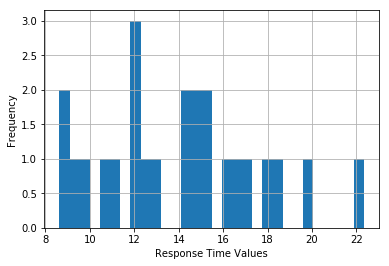

In [9]:
# Build the visualizations here
fig, ax = plt.subplots()
stroop.Congruent.plot(kind="hist", bins=30)
ax.set_xlabel("Response Time Values", size=12)
ax.set_xlabel("Frequency", size=12)
ax.grid(which = 'major')

This shows the frequency of the specific response times for congruent words. It appears the most frequent response time was around 12 seconds.

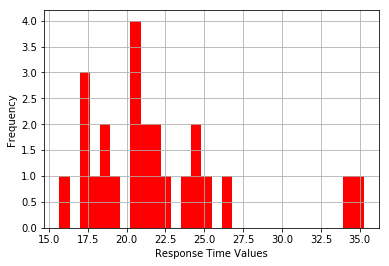

In [10]:
fig, ax = plt.subplots()
stroop.Incongruent.plot(kind="hist", bins = 30,color='red')
ax.set_xlabel("Response Time Values", size=12)
ax.set_xlabel("Frequency", size=12)
ax.grid(which = 'major')

This shows the frequency of the specific response times for incongruent words. It appears the most frequent response time was around 21 seconds.

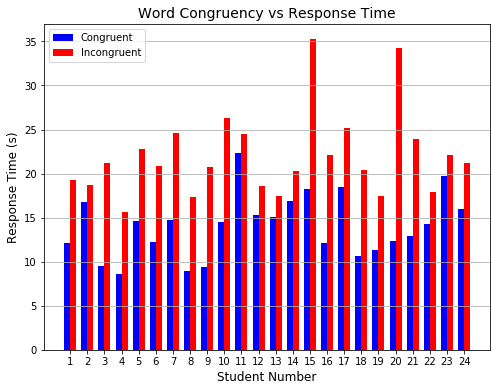

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
index = stroop.index
# barchart = ax.bar(x-coord of bars, values,bar_width, color, bar title )
rects1 = ax.bar(index, stroop.Congruent, bar_width, color= 'b', label='Congruent');
rects2 = ax.bar(index + bar_width, stroop.Incongruent, bar_width, color= 'r', label='Incongruent');


ax.set_xlabel('Student Number', size=12)
ax.set_ylabel('Response Time (s)', size = 12)
ax.set_title('Word Congruency vs Response Time', size=14)
ax.grid(which='major', axis='y')
ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(np.arange(1,25,1))

ax.legend()
plt.show()


In this side-by-side bar chart, we can see that the response time differences between the two conditions for each student.

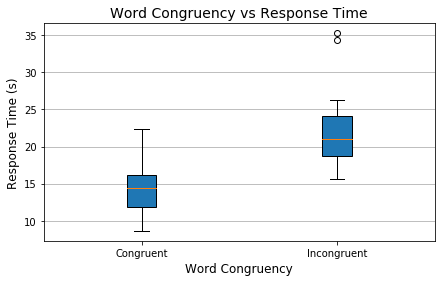

In [12]:
all_data = [stroop.Congruent, stroop.Incongruent]
labels = ['Congruent', 'Incongruent']

fig, ax = plt.subplots(figsize=(7, 4))

# rectangular box plot
bplot1 = ax.boxplot(all_data,
                    vert=True,  # vertical box alignment
                    patch_artist=True,  # fill with color
                    labels=labels)  # will be used to label x-ticks

ax.set_xlabel('Word Congruency', size = 12)
ax.set_ylabel('Response Time (s)', size = 12)
ax.set_title('Word Congruency vs Response Time', size=14)
ax.grid(which='major', axis='y')
ax.legend()

plt.show()

In this box plot, we can clearly see the difference between the two conditions with the average response times for the congruent and incongruent conditions being approximately 14 seconds and 22 seconds, respectively. The range between the lower and upper limits of the boxplot for the congruent condition is greater than that for the incongruent condition, however, the interquartile range is less. Barring the two outlier values, the range of the limits for the incongruent condition is less while the interquartile range is greater.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

### Perform the statistical test here

The confidence level is 95% or alpha = 0.05

In [ ]:

stats.ttest_rel(stroop["Congruent"], stroop["Incongruent"])

The t-statistic shows that the difference in response time for the congruent words is negative. In other words, the response time of the congruent words is less the incongruent words and this is not by chance. 

The p-value=4.1030005857111781e-08. So, p-value < alpha

With a level of significance of 0.05, we would reject the Null hypotheses.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

**What do you think is responsible for the effects observed?**
I think that the effect observed is caused by an interference in the brain between different information your brain receives. This being, what the word says and the color of the words. 
The Stroop effect may be explained by two theories:
1. Speed of Processing Theory: stating that words are read faster than colors can be named.
2. Selective Attention Theory: stating that naming colors requires more attention than reading words.

In addition, an increased interference effect is found in disorders such as brain damage, and other neurodegenerative diseases, attention-deficit hyperactivity disorder, or mental disorders such as schizophrenia, addictions, and depression.

**Can you think of an alternative or similar task that would result in a similar effect? **

An alternate or similar task that may have a similar effect is having to say the name of an object with a congruent or incongruent picture above the word. 

_Sources_

- https://faculty.washington.edu/chudler/words.html
- https://en.wikipedia.org/wiki/Stroop_effect
- stackoverflow.com
- scipy.org
- matplotlib.org

